### Packages and settings

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 30)


In [5]:
dataset1 = pd.read_csv("train.csv")
dataset2 = pd.read_csv("test.csv")


dataset = pd.concat([dataset1, dataset2], ignore_index=True)

dataset1.shape
dataset2.shape
dataset.shape



(59598, 24)

(14900, 24)

(74498, 24)

In [6]:
dataset.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home    Education Level Marital Status  \
0       No                  22   Associate Degree        Married   
1       No                  21    Master’s Degree       Divorced   
2       No                  11  Bachelor’s Degree        Married   
3       No                  27        High School         Single   
4      Yes                  71        High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure Remote Work  \
0                     0       Mid       Medium              89          No   
1                     3       Mid       Medium              21          No   
2                     3       Mid       Medium              74          No   
3                     2       Mid        Small              50         Yes   
4                     0    Senior       Medium              68          No   

  Leadership Opportunities Innovation Opportunities Company Reputation  \
0                       No                       No          Excellent   
1                       No                       No               Fair   
2                       No                       No               Poor   
3                       No                       No               Good   
4                       No                       No               Fair   

  Employee Recognition Attrition  
0               Medium    Stayed  
1                  Low    Stayed  
2                  Low    Stayed  
3               Medium    Stayed  
4               Medium    Stayed

## EDA

In [8]:
dataset.Attrition.value_counts() # well balanced

Stayed    39128
Left      35370
Name: Attrition, dtype: int64

In [9]:
dataset.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [10]:
# check missings
dataset.isna().any()

Employee ID                 False
Age                         False
Gender                      False
Years at Company            False
Job Role                    False
Monthly Income              False
Work-Life Balance           False
Job Satisfaction            False
Performance Rating          False
Number of Promotions        False
Overtime                    False
Distance from Home          False
Education Level             False
Marital Status              False
Number of Dependents        False
Job Level                   False
Company Size                False
Company Tenure              False
Remote Work                 False
Leadership Opportunities    False
Innovation Opportunities    False
Company Reputation          False
Employee Recognition        False
Attrition                   False
dtype: bool

In [11]:
dataset.describe()

Employee ID           Age  Years at Company  Monthly Income  \
count  74498.000000  74498.000000      74498.000000    74498.000000   
mean   37249.500000     38.529746         15.721603     7299.379514   
std    21505.864514     12.083456         11.223744     2152.508566   
min        1.000000     18.000000          1.000000     1226.000000   
25%    18625.250000     28.000000          7.000000     5652.000000   
50%    37249.500000     39.000000         13.000000     7348.000000   
75%    55873.750000     49.000000         23.000000     8876.000000   
max    74498.000000     59.000000         51.000000    16149.000000   

       Number of Promotions  Distance from Home  Number of Dependents  \
count          74498.000000        74498.000000          74498.000000   
mean               0.832935           49.991584              1.650326   
std                0.995289           28.513611              1.553633   
min                0.000000            1.000000              0.000000   
25%                0.000000           25.000000              0.000000   
50%                1.000000           50.000000              1.000000   
75%                2.000000           75.000000              3.000000   
max                4.000000           99.000000              6.000000   

       Company Tenure  
count    74498.000000  
mean        55.727456  
std         25.399349  
min          2.000000  
25%         36.000000  
50%         56.000000  
75%         76.000000  
max        128.000000

In [12]:
# boxplots for numerical features
# histograms for numerical features to see outliers
# barplots for categorical featues

In [13]:
dataset.info()
categorical_features = dataset.select_dtypes('object').columns.to_list()
numerical_features = set(dataset.columns.to_list())- set(categorical_features)
numerical_features
categorical_features.remove('Attrition')
numerical_features.remove('Employee ID')
categorical_features



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

{'Age',
 'Company Tenure',
 'Distance from Home',
 'Employee ID',
 'Monthly Income',
 'Number of Dependents',
 'Number of Promotions',
 'Years at Company'}

['Gender',
 'Job Role',
 'Work-Life Balance',
 'Job Satisfaction',
 'Performance Rating',
 'Overtime',
 'Education Level',
 'Marital Status',
 'Job Level',
 'Company Size',
 'Remote Work',
 'Leadership Opportunities',
 'Innovation Opportunities',
 'Company Reputation',
 'Employee Recognition']

### Boxplots

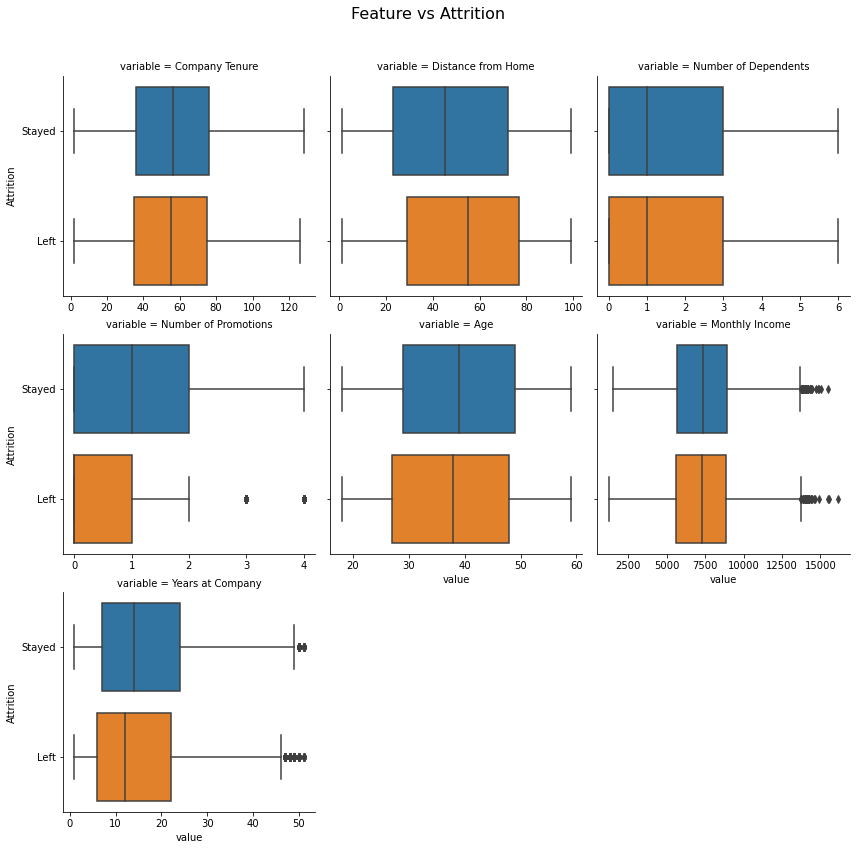

In [15]:
# convert from wide format to tidy format
dataset_numerical = dataset[list(numerical_features) + ["Attrition"]]
dataset_melted = dataset_numerical.melt(id_vars='Attrition')
p = sns.catplot(kind='box', data=dataset_melted, x='value', y='Attrition', col='variable', col_wrap=3, height=4, sharex = False)
# add figure level title
p.fig.subplots_adjust(top=0.9);
p.fig.suptitle('Feature vs Attrition', size=16);



### Histograms to see outliers

In [42]:
dataset_melted

Attrition          variable  value
0         Stayed    Company Tenure     89
1         Stayed    Company Tenure     21
2         Stayed    Company Tenure     74
3         Stayed    Company Tenure     50
4         Stayed    Company Tenure     68
...          ...               ...    ...
521481    Stayed  Years at Company     42
521482      Left  Years at Company     15
521483      Left  Years at Company      5
521484    Stayed  Years at Company      4
521485      Left  Years at Company     48

[521486 rows x 3 columns]

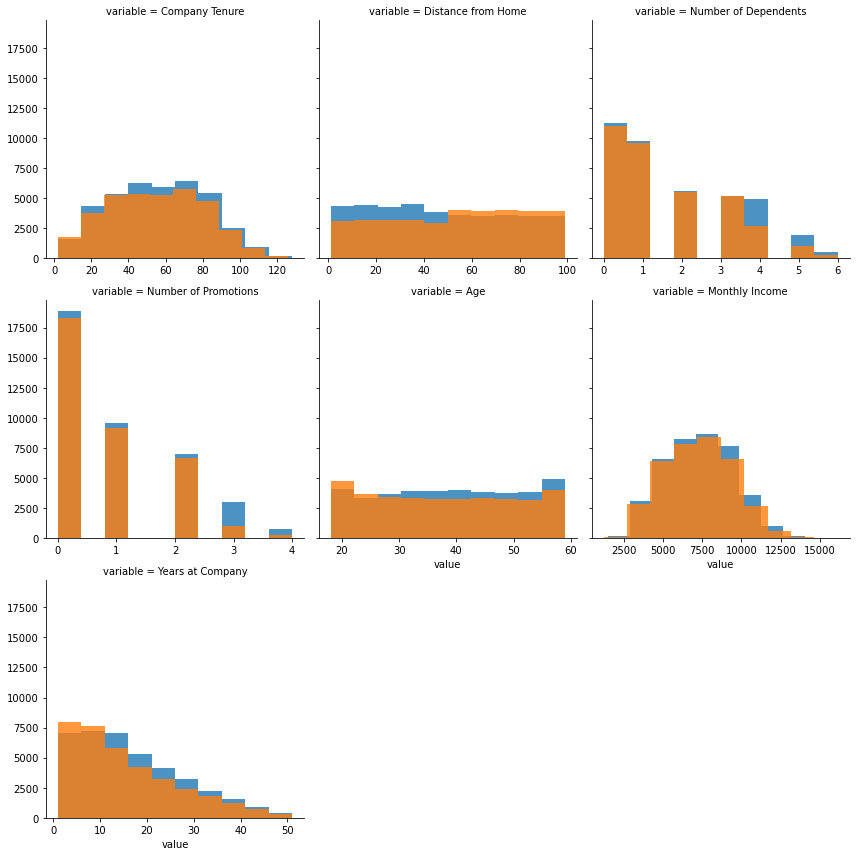

In [74]:
g = sns.FacetGrid(dataset_melted, hue="Attrition", col="variable", col_wrap=3, height = 4, sharex=False)
g.map(plt.hist, "value", alpha=.8, bins = 10);